In [13]:
import fuzzylite as fl
import numpy as np
from matplotlib import pyplot as plt

age = fl.InputVariable(
    'age',
    enabled=True,
    minimum=0.0,
    maximum=1.0, 
    terms=[
            fl.Triangle("teenager", 0.25, 0.45, 0.65),
            fl.Triangle("adult", 0.45, 0.65, 0.85),
            fl.Trapezoid("infant", -1, 0, .25, 0.45),
            fl.Trapezoid("elderly", .65, .85, 1, 2),
        ],
)

In [14]:
age_vals = np.linspace(0, 1, 100)

In [33]:
def plot_variable(var):
    plt.title(var.name)
    linguistic_terms_names = []
    
    for term in var.terms:
        membership_fn = [term.membership(e) for e in age_vals]
        plt.plot(age_vals, membership_fn)
        linguistic_terms_names.append(term.name)
    plt.legend(linguistic_terms_names)
    plt.xlabel(var.name)
    plt.ylabel('membership function')
    plt.show()

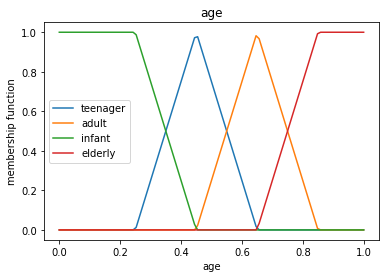

In [34]:
plot_variable(age)

In [35]:
def generate_var_terms(universe: tuple[float], trapezoid_points: tuple[float], n_terms: int = 4) -> list[fl.Term]:
    """Generates terms given universe, trapezoid points and number of term

    Args:
        universe (tuple[float]): general universe of the variable
        trapezoid_points (tuple[float]): left/right 
        n_terms (int, optional): Number of terms. Defaults to 4.

    Returns:
        list[fl.Term]: list of terms
    """
    points = np.linspace(trapezoid_points[0], trapezoid_points[1], n_terms)
    terms = [fl.Trapezoid("first_bin", universe[0] - 1, universe[0], points[0], points[1]),
             fl.Trapezoid("last_bin", points[-2], points[-1], universe[1], universe[1] + 1),]
    
    if len(points) > 2: 
        for i in range(n_terms - 2):
            index = i + 2
            term = fl.Triangle(f'bin_{index}', points[i], points[i + 1], points[i + 2])
            terms.append(term)
    return terms


[<fuzzylite.term.Trapezoid object at 0x7f4eeb44dc00>, <fuzzylite.term.Trapezoid object at 0x7f4eeb44fee0>, <fuzzylite.term.Triangle object at 0x7f4eeb44ca90>, <fuzzylite.term.Triangle object at 0x7f4eeb44e260>, <fuzzylite.term.Triangle object at 0x7f4eeb44cc70>, <fuzzylite.term.Triangle object at 0x7f4eeb44fa30>]


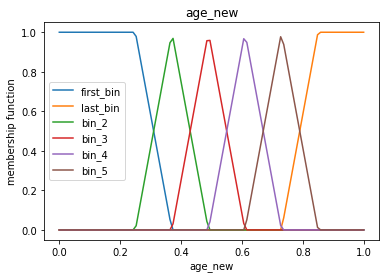

In [39]:
age_new = fl.InputVariable('age_new', enabled=True, minimum=0, maximum=1, 
                           terms=generate_var_terms(universe=(0, 1), trapezoid_points=(.25, .85), n_terms=6))
plot_variable(age_new)